In [1]:
!python3 -m venv covid_env
!source covid_env/bin/activate

In [ ]:
def find_max(nums):
    max_num = float("-inf") # smaller than all other numbers
    for num in nums:
        if num > max_num:
            # (Fill in the missing line here)
    return max_num

In [2]:

import numpy as np
import io
    
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#https://github.com/ploner/coronavirus-clustering/blob/master/notebook-v1/corona-clustering.ipynb

#https://wellcomeopenresearch.org/articles/5-56
    
    

In [3]:
#df_base=pd.read_csv("owid-covid-data2.csv",sep=',')

url='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df_base=pd.read_csv(url,sep=',')


In [4]:
df_base.shape

(25497, 34)

In [4]:
df_base.drop(df_base.loc[df_base['location'].isin({'Hong Kong','Guernsey','Jersey','International','Kosovo','World'})].index, inplace=True)


In [5]:
(df_base.isna().mean().round(4)*100).sort_values(ascending=False)

new_tests                          74.43
new_tests_per_thousand             74.43
total_tests                        71.64
total_tests_per_thousand           71.64
new_tests_smoothed                 69.38
new_tests_smoothed_per_thousand    69.38
tests_units                        66.87
handwashing_facilities             58.91
extreme_poverty                    39.34
male_smokers                       26.25
female_smokers                     25.40
stringency_index                   17.62
hospital_beds_per_thousand         14.95
gdp_per_capita                      9.05
aged_65_older                       8.58
aged_70_older                       7.75
median_age                          7.27
cvd_death_rate                      7.12
diabetes_prevalence                 4.15
population_density                  2.99
new_deaths_per_million              0.86
total_deaths_per_million            0.86
new_cases_per_million               0.86
total_cases_per_million             0.86
new_deaths      

In [5]:
df = (df_base.sort_values('date').groupby('location').apply(lambda x: x.tail(1))).reset_index(drop=True)

In [6]:
(df.isna().mean().round(4)*100).sort_values(ascending=False)

stringency_index                   89.32
new_tests                          88.35
new_tests_per_thousand             88.35
new_tests_smoothed                 87.38
total_tests_per_thousand           87.38
new_tests_smoothed_per_thousand    87.38
tests_units                        87.38
total_tests                        87.38
handwashing_facilities             55.83
extreme_poverty                    41.75
male_smokers                       33.01
female_smokers                     32.04
hospital_beds_per_thousand         20.39
gdp_per_capita                     12.14
aged_65_older                      11.65
aged_70_older                      10.68
cvd_death_rate                     10.19
median_age                         10.19
diabetes_prevalence                 6.80
population_density                  4.37
date                                0.00
total_cases                         0.00
continent                           0.00
location                            0.00
total_deaths    

In [7]:
df[df.location.isin({'India','China'})]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
41,CHN,Asia,China,2020-06-25,84673.0,20.0,4640.0,0.0,58.828,0.014,3.224,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91
88,IND,Asia,India,2020-06-25,473105.0,16922.0,14894.0,418.0,342.829,12.262,10.793,0.303,7560782.0,207871.0,5.479,0.151,187302.0,0.136,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66


In [ ]:
#df.set_value('C', 'x', 10)

In [8]:
list(df[df.location=='India']['total_cases'].astype(int))[0]

473105

In [9]:
list(df[df.location=='India']['population'].astype(int))[0]

1380004385

In [10]:
# Population outlier treatment for India and China
def population_outlier_treatment(df, p_country):
    
    total_cases_per_million= ((list(df[df.location==p_country]['total_cases'].astype(int))[0])/
                               (list(df[df.location==p_country]['population'].astype(int))[0]/10)
                              )*1000000
    
    
    total_deaths_per_million= ((list(df[df.location==p_country]['total_deaths'].astype(int))[0])/
                               (list(df[df.location==p_country]['population'].astype(int))[0]/10)
                              )*1000000
    
    return total_cases_per_million,total_deaths_per_million
    

In [11]:
df.loc[ (df['location']=='India'),['total_cases_per_million','total_deaths_per_million']]= population_outlier_treatment(df,'India')
df.loc[ (df['location']=='China'),['total_cases_per_million','total_deaths_per_million']]= population_outlier_treatment(df,'China')


In [13]:
df[df.location.isin({'India','China'})]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
41,CHN,Asia,China,2020-06-18,84458.0,36.0,4638.0,0.0,586.789446,0.025,32.223466,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.94,1439323774,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91
88,IND,Asia,India,2020-06-18,366946.0,12881.0,12237.0,334.0,2659.020536,9.334,88.673631,0.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66


In [973]:
'''
Jersey_population =101073
Kosovo_population =1810366
Guernsey=173863

hk_total_cases_per_million=140

HK_total_deaths_per_million=0.5

International

total_cases_per_million      0.81
new_cases_per_million        0.81
total_deaths_per_million     0.81
new_deaths_per_million       0.81
'''

SyntaxError: invalid syntax (<ipython-input-973-2d3c3696b1b4>, line 11)

In [14]:
df.location.unique().shape

(203,)

In [ ]:
#df[{'location','aged_65_older'}]

In [12]:
# POPULATE MISSING DIABETES NUMBERS 

df.loc[df['location']== "Taiwan", "diabetes_prevalence"] = 6.6
df.loc[df['location']== "Gibraltar", "diabetes_prevalence"] = 7.5
df.loc[df['location']== "Anguilla", "diabetes_prevalence"] = 11
df.loc[df['location']== "Bonaire Sint Eustatius and Saba", "diabetes_prevalence"] = 10.6
df.loc[df['location']== "Faeroe Islands", "diabetes_prevalence"] = 9.5
df.loc[df['location']== "Falkland Islands", "diabetes_prevalence"] = 6.0
df.loc[df['location']== "Isle of Man", "diabetes_prevalence"] = 6.2
df.loc[df['location']== "Montserrat", "diabetes_prevalence"] = 10.2
df.loc[df['location']== "Northern Mariana Islands", "diabetes_prevalence"] = 9.8
df.loc[df['location']== "Sint Maarten (Dutch part)", "diabetes_prevalence"] = 13.07
df.loc[df['location']== "Syria", "diabetes_prevalence"] = 12.6
df.loc[df['location']== "Turks and Caicos Islands", "diabetes_prevalence"] = 12.6
df.loc[df['location']== "Vatican", "diabetes_prevalence"] = 8.6
df.loc[df['location']== "Western Sahara", "diabetes_prevalence"] = 6.8





# POPULATE MISSING DENSITY NUMBERS 

df.loc[df['location']== "Anguilla", "population_density"] = 167
df.loc[df['location']== "Bonaire Sint Eustatius and Saba", "population_density"] = 77
df.loc[df['location']== "Falkland Islands", "population_density"] = 1
df.loc[df['location']== "Vatican", "population_density"] = 924
df.loc[df['location']== "Montserrat", "population_density"] = 50
df.loc[df['location']== "South Sudan", "population_density"] = 20

df.loc[df['location']== "Syria", "population_density"] = 256
df.loc[df['location']== "Taiwan", "population_density"] = 649
df.loc[df['location']== "Western Sahara", "population_density"] = 2




# POPULATE MISSING HOSPITALS BEDS NUMBERS 
#https://data.worldbank.org/indicator/SH.MED.BEDS.ZS
df.loc[df['location']== "Andorra", "hospital_beds_per_100k"] = 2.5
df.loc[df['location']== "Anguilla", "hospital_beds_per_100k"] = 2.9
df.loc[df['location']== "British Virgin Islands", "hospital_beds_per_100k"] = 2.9
df.loc[df['location']== "Angola", "hospital_beds_per_100k"] = 0.8
df.loc[df['location']== "Aruba", "hospital_beds_per_100k"] = 3.2
df.loc[df['location']== "Bermuda", "hospital_beds_per_100k"] = 6.3
df.loc[df['location']== "Bonaire Sint Eustatius and Saba", "hospital_beds_per_100k"] = 3.0
df.loc[df['location']== "Cayman Islands", "hospital_beds_per_100k"] = 3.0
df.loc[df['location']== "Chad", "hospital_beds_per_100k"] = 0.4
df.loc[df['location']== "Congo", "hospital_beds_per_100k"] = 1.6
df.loc[df['location']== "Cote d'Ivoire", "hospital_beds_per_100k"] = 0.4
df.loc[df['location']== "Curacao", "hospital_beds_per_100k"] = 3.2
df.loc[df['location']== "Democratic Republic of Congo", "hospital_beds_per_100k"] = 0.8
df.loc[df['location']== "Faeroe Islands", "hospital_beds_per_100k"] = 2.2
df.loc[df['location']== "Falkland Islands", "hospital_beds_per_100k"] = 4.0
df.loc[df['location']== "French Polynesia", "hospital_beds_per_100k"] = 6.0
df.loc[df['location']== "Gibraltar", "hospital_beds_per_100k"] = 3.0
df.loc[df['location']== "Greenland", "hospital_beds_per_100k"] = 14.4
df.loc[df['location']== "Guam", "hospital_beds_per_100k"] = 2.8
df.loc[df['location']== "Guinea-Bissau", "hospital_beds_per_100k"] = 1.0
df.loc[df['location']== "Isle of Man", "hospital_beds_per_100k"] = 1.6
df.loc[df['location']== "Maldives", "hospital_beds_per_100k"] = 4.3
df.loc[df['location']== "Mauritania", "hospital_beds_per_100k"] = 0.4
df.loc[df['location']== "Montserrat", "hospital_beds_per_100k"] = 2.8
df.loc[df['location']== "Namibia", "hospital_beds_per_100k"] = 2.7
df.loc[df['location']== "New Caledonia", "hospital_beds_per_100k"] = 6.5
df.loc[df['location']== "Nigeria", "hospital_beds_per_100k"] = 0.5
df.loc[df['location']== "Northern Mariana Islands", "hospital_beds_per_100k"] = 2.9
df.loc[df['location']== "Palestine", "hospital_beds_per_100k"] = 1.0
df.loc[df['location']== "Papua New Guinea", "hospital_beds_per_100k"] = 4.0
df.loc[df['location']== "Puerto Rico", "hospital_beds_per_100k"] = 3.3
df.loc[df['location']== "Rwanda", "hospital_beds_per_100k"] = 1.6
df.loc[df['location']== "Senegal", "hospital_beds_per_100k"] = 0.3
df.loc[df['location']== "Sierra Leone", "hospital_beds_per_100k"] = 0.4
df.loc[df['location']== "Sint Maarten (Dutch part)", "hospital_beds_per_100k"] = 4.7
df.loc[df['location']== "South Sudan", "hospital_beds_per_100k"] = 0.8
df.loc[df['location']== "Taiwan", "hospital_beds_per_100k"] = 4.2
df.loc[df['location']== "Turks and Caicos Islands", "hospital_beds_per_100k"] = 2.8
df.loc[df['location']== "United States Virgin Islands", "hospital_beds_per_100k"] = 2.9
df.loc[df['location']== "Vatican", "hospital_beds_per_100k"] = 3.4
df.loc[df['location']== "Western Sahara", "hospital_beds_per_100k"] = 1.2

In [13]:
df['hospital_beds_per_100k']=df['hospital_beds_per_100k'].fillna(df.hospital_beds_per_100k.mean())
df['diabetes_prevalence']=df['diabetes_prevalence'].fillna(df.diabetes_prevalence.mean())
df['cvd_death_rate']=df['cvd_death_rate'].fillna(df.cvd_death_rate.mean())
df['median_age']=df['median_age'].fillna(df.median_age.mean())
df['aged_70_older']=df['aged_70_older'].fillna(df.aged_70_older.mean())
df['aged_65_older']=df['aged_65_older'].fillna(df.aged_65_older.mean())


In [14]:
(df.isna().mean().round(4)*100).sort_values(ascending=False)

stringency_index                   89.32
new_tests                          88.35
new_tests_per_thousand             88.35
new_tests_smoothed_per_thousand    87.38
total_tests                        87.38
total_tests_per_thousand           87.38
new_tests_smoothed                 87.38
tests_units                        87.38
handwashing_facilities             55.83
extreme_poverty                    41.75
male_smokers                       33.01
female_smokers                     32.04
hospital_beds_per_thousand         20.39
gdp_per_capita                     12.14
total_cases_per_million             0.00
new_cases                           0.00
new_deaths                          0.00
total_deaths                        0.00
total_deaths_per_million            0.00
total_cases                         0.00
date                                0.00
location                            0.00
continent                           0.00
new_cases_per_million               0.00
hospital_beds_pe

In [18]:
df.shape

(203, 35)

In [19]:
df.tail(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,hospital_beds_per_100k
198,VNM,Asia,Vietnam,2020-06-18,335.0,0.0,0.0,0.0,3.442,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97338583,308.127,32.6,7.15000,4.718,6171.884,2.0,245.465000,6.00,1.0,45.9,85.847,2.6,75.40,2.784211
199,ESH,Africa,Western Sahara,2020-06-18,23.0,0.0,1.0,0.0,38.505,0.000,1.674,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,597330,2.000,28.4,8.80783,1.380,NaN,NaN,256.172049,6.80,NaN,NaN,NaN,NaN,70.26,1.200000
200,YEM,Asia,Yemen,2020-06-18,902.0,13.0,244.0,29.0,30.242,0.436,8.181,0.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29825968,53.508,20.3,2.92200,1.583,1479.147,18.8,495.003000,5.35,7.6,29.2,49.542,0.7,66.12,2.784211
201,ZMB,Africa,Zambia,2020-06-18,1412.0,7.0,11.0,0.0,76.806,0.381,0.598,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18383956,22.995,17.7,2.48000,1.542,3689.251,57.5,234.499000,3.94,3.1,24.7,13.938,2.0,63.89,2.784211
202,ZWE,Africa,Zimbabwe,2020-06-18,401.0,7.0,4.0,0.0,26.980,0.471,0.269,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927,42.729,19.6,2.82200,1.882,1899.775,21.4,307.846000,1.82,1.6,30.7,36.791,1.7,61.49,2.784211


CORRELATION BETWEEN VARIABLES

In [15]:
from datetime import date
def moving_average(df_base, df):
    month_ago=(pd.to_datetime(date.today(), format="%Y-%m-%d") - pd.DateOffset(months=1)).date()
    
    df_base=df_base[pd.to_datetime(df_base.date, format="%Y-%m-%d") > pd.Timestamp(month_ago)]
    #df_base=df_base[df_base.date > '2020-05-20']
    
    
    tmp=df_base.groupby('location')[('new_cases','new_deaths')].mean().reset_index() \
        .rename(columns={'new_cases':'avg_new_cases','new_deaths':'avg_new_deaths'})

    df=pd.merge(df, tmp, on='location')
    return df

# total_death/total_cases 
# new_death/new_cases 

In [16]:
df=moving_average(df_base,df)

In [17]:
df[{'location','avg_new_cases','avg_new_deaths'}].head(10)

,location,avg_new_deaths,avg_new_cases
0,Afghanistan,13.580645,617.193548
1,Albania,0.483871,36.000000
2,Algeria,8.677419,127.161290
3,Andorra,0.032258,2.967742
4,Angola,0.193548,3.870968
5,Anguilla,0.000000,0.000000
6,Antigua and Barbuda,0.000000,1.290323
7,Argentina,20.419355,1218.548387
8,Armenia,9.838710,485.677419
9,Aruba,0.000000,0.000000


In [862]:
#df.drop(['iso_code','new_tests','new_tests_per_thousand','tests_units','total_tests','total_tests_per_thousand','handwashing_facilities'], axis=1, inplace=True)

In [863]:
#df.drop(['location','date'], axis=1, inplace=True)


In [18]:
df1=df[{'total_cases_per_million',
        'total_deaths_per_million',
        'population_density',
        'location',
        'avg_new_cases',
        'avg_new_deaths',
        'hospital_beds_per_100k'
        #'diabetes_prevalence',
        #'median_age',
        #'aged_65_older',
        #'aged_70_older',
        #'cvd_death_rate'
       }]




In [24]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix (df1, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

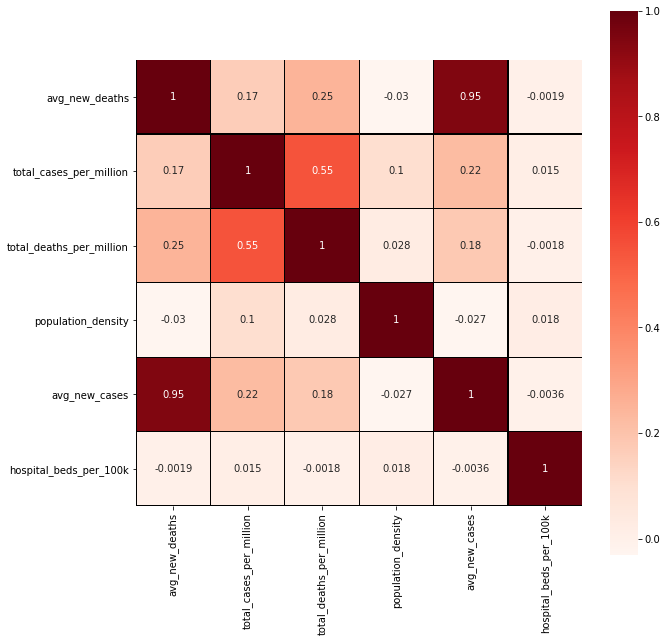

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), square=True, annot=True, cmap='Reds',linecolor="black", linewidths=0.20)
plt.show()

In [19]:
df1.replace(0, 1, inplace=True)

/Users/jatinmalhotra/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [20]:
df2= df1.drop(['location'],axis=1)

In [21]:
log_data = df2.apply(np.log)
data_scaled=log_data

In [22]:
log_data.head()

,population_density,hospital_beds_per_100k,avg_new_cases,total_deaths_per_million,avg_new_deaths,total_cases_per_million
0,3.996768,1.046034,6.425183,2.798196,2.608646,6.637685
1,4.652731,1.046034,3.583519,2.793126,-0.725937,6.599311
2,2.853477,1.046034,4.845456,2.986540,2.160724,5.632319
3,5.098371,0.916291,1.087801,6.511757,-3.433987,9.311616
4,3.173460,-0.223144,1.353505,-1.190728,-1.642228,1.749374


In [30]:
log_data.isnull().sum()

avg_new_deaths              0
total_cases_per_million     0
total_deaths_per_million    0
population_density          0
avg_new_cases               0
hospital_beds_per_100k      0
dtype: int64

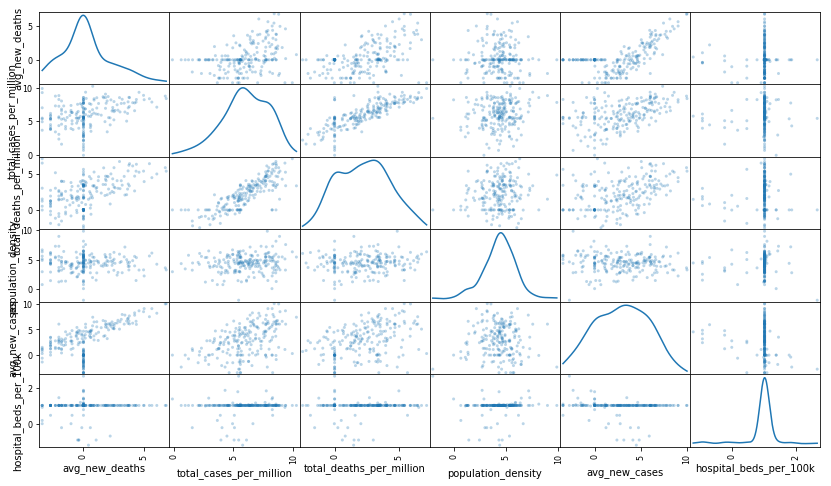

In [31]:
pd.plotting.scatter_matrix (log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [959]:
# standardizing the data
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()
'''

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\ndata_scaled = scaler.fit_transform(df2)\n\n# statistics of scaled data\npd.DataFrame(data_scaled).describe()\n'

In [32]:
data_scaled.shape

(203, 6)

In [480]:
'''
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=2)
#pca = PCA(n_components='mle',svd_solver='full')

pca.fit(data_scaled)

# TODO: Transform the sample log-data using the PCA fit above
pca_data = pca.transform(data_scaled)
'''

In [482]:
'''
pca_data_scaled = pd.DataFrame(np.round(pca_data, 2), columns = ['Dim 1', 'Dim 2'])
data_scaled =pca_data_scaled
'''

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=5, init='k-means++')
clusterer.fit(data_scaled)
preds = clusterer.predict(data_scaled)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

kmeans_frame = pd.DataFrame(data_scaled)
kmeans_frame['cluster'] = preds
kmeans_frame['cluster'].value_counts()



1    45
3    44
2    44
0    38
4    35
Name: cluster, dtype: int64

In [24]:
df['location']= df['location'].str.lower()

In [35]:
# Save Model
import pickle
pickle.dump(clusterer, open('model.pkl', 'wb'))



In [25]:
# Add Clusters to the datatset
kmeans_cluster0 = df1.loc[kmeans_frame[kmeans_frame['cluster']==0].index.values]
kmeans_cluster1 = df1.loc[kmeans_frame[kmeans_frame['cluster']==1].index.values]
kmeans_cluster2 = df1.loc[kmeans_frame[kmeans_frame['cluster']==2].index.values]
kmeans_cluster3 = df1.loc[kmeans_frame[kmeans_frame['cluster']==3].index.values]
kmeans_cluster4 = df1.loc[kmeans_frame[kmeans_frame['cluster']==4].index.values]

In [26]:
clusters_median_stats= pd.DataFrame(columns = kmeans_cluster0.median().keys())
clusters_median_stats.loc[0] =  kmeans_cluster0.median().values.tolist()
clusters_median_stats.loc[1] =  kmeans_cluster1.median().values.tolist()
clusters_median_stats.loc[2] =  kmeans_cluster2.median().values.tolist()
clusters_median_stats.loc[3] =  kmeans_cluster3.median().values.tolist()
clusters_median_stats.loc[4] =  kmeans_cluster4.median().values.tolist()


In [27]:
clusters_mean_stats= pd.DataFrame(columns = kmeans_cluster0.mean().keys())
clusters_mean_stats.loc[0] =  kmeans_cluster0.mean().values.tolist()
clusters_mean_stats.loc[1] =  kmeans_cluster1.mean().values.tolist()
clusters_mean_stats.loc[2] =  kmeans_cluster2.mean().values.tolist()
clusters_mean_stats.loc[3] =  kmeans_cluster3.mean().values.tolist()
clusters_mean_stats.loc[4] =  kmeans_cluster4.mean().values.tolist()


In [28]:
df.loc[kmeans_frame[kmeans_frame['cluster']==0].index.values,'cluster']=0
df.loc[kmeans_frame[kmeans_frame['cluster']==1].index.values,'cluster']=1
df.loc[kmeans_frame[kmeans_frame['cluster']==2].index.values,'cluster']=2
df.loc[kmeans_frame[kmeans_frame['cluster']==3].index.values,'cluster']=3
df.loc[kmeans_frame[kmeans_frame['cluster']==4].index.values,'cluster']=4

In [40]:
clusters_mean_stats.round(2)

,avg_new_deaths,total_cases_per_million,total_deaths_per_million,population_density,avg_new_cases,hospital_beds_per_100k
0,0.60,211.69,3.90,119.41,39.85,2.44
1,4.98,2978.13,57.78,347.75,276.93,2.69
2,0.90,189.99,1.34,134.82,0.93,3.33
3,147.36,3140.75,208.26,149.23,3650.18,2.78
4,0.66,2546.47,99.66,915.24,3.92,2.90


In [29]:
clusters_mean_log = clusters_mean_stats.apply(np.log)

In [30]:
clusters_mean_log['risk_score']=(clusters_mean_log['avg_new_cases'] * clusters_mean_log['avg_new_cases'] + \
                                clusters_mean_log['total_cases_per_million']*clusters_mean_log['total_cases_per_million']+\
                                clusters_mean_log['total_deaths_per_million']*clusters_mean_log['total_deaths_per_million']+\
                                clusters_mean_log['population_density']*clusters_mean_log['population_density']+\
                                clusters_mean_log['avg_new_deaths']*clusters_mean_log['avg_new_deaths'])/5
            

                                    

In [43]:
clusters_mean_log

,avg_new_deaths,total_cases_per_million,total_deaths_per_million,population_density,avg_new_cases,hospital_beds_per_100k,risk_score
0,-0.506715,5.355117,1.361327,4.782596,3.685080,0.892558,13.448058
1,1.604658,7.999050,4.056662,5.851497,5.623757,0.991003,29.776577
2,-0.106755,5.246990,0.295319,4.903921,-0.075349,1.201646,10.336726
3,4.992857,8.052216,5.338789,5.005465,8.202532,1.023964,42.121137
4,-0.410856,7.842465,4.601790,6.819184,1.366156,1.065064,26.243437


In [31]:
clusters_mean_log=clusters_mean_log.sort_values(by=['risk_score'], ascending = False)

In [45]:
clusters_mean_log

,avg_new_deaths,total_cases_per_million,total_deaths_per_million,population_density,avg_new_cases,hospital_beds_per_100k,risk_score
3,4.992857,8.052216,5.338789,5.005465,8.202532,1.023964,42.121137
1,1.604658,7.999050,4.056662,5.851497,5.623757,0.991003,29.776577
4,-0.410856,7.842465,4.601790,6.819184,1.366156,1.065064,26.243437
0,-0.506715,5.355117,1.361327,4.782596,3.685080,0.892558,13.448058
2,-0.106755,5.246990,0.295319,4.903921,-0.075349,1.201646,10.336726


In [32]:
very_high = clusters_mean_log[0:1].index.values[0]
high      = clusters_mean_log[1:2].index.values[0]
medium    = clusters_mean_log[2:3].index.values[0]
low       = clusters_mean_log[3:4].index.values[0]
very_low  = clusters_mean_log[4:5].index.values[0]


In [47]:
very_high,high,medium,low,very_low

(3, 1, 4, 0, 2)

In [33]:
#a=df.groupby('cluster')['location'].apply(lambda x: x.to_json(orient='values')).reset_index()
results=df.groupby('cluster')['location'].apply(lambda x: ','.join(x)).reset_index().rename(columns={'cluster':'risk_level'})

In [34]:
# With PCA
#log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
# With PCA
#true_centers = np.exp(log_centers)

# Without PCA
true_centers = np.exp(centers)


# Display the true centers
segments = ['Cluster {}'.format(i) for i in range(0,len(centers))]
#true_centers = pd.DataFrame(np.round(centers), columns = df2.keys())
true_centers = pd.DataFrame(np.round(true_centers), columns = df2.keys())

true_centers.index = segments
display(true_centers)

,population_density,hospital_beds_per_100k,avg_new_cases,total_deaths_per_million,avg_new_deaths,total_cases_per_million
Cluster 0,208.0,3.0,1.0,30.0,0.0,1342.0
Cluster 1,84.0,2.0,81.0,18.0,2.0,848.0
Cluster 2,59.0,2.0,19.0,2.0,0.0,121.0
Cluster 3,77.0,3.0,1066.0,89.0,32.0,2705.0
Cluster 4,46.0,3.0,1.0,1.0,1.0,46.0


In [50]:
results.round()

,risk_level,location
0,0.0,"albania,australia,benin,burkina faso,central a..."
1,1.0,"afghanistan,algeria,armenia,austria,azerbaijan..."
2,2.0,"angola,anguilla,belize,bhutan,bonaire sint eus..."
3,3.0,"argentina,bangladesh,belgium,bolivia,brazil,ca..."
4,4.0,"andorra,antigua and barbuda,aruba,bahamas,barb..."


In [35]:
results["risk_level"]=results["risk_level"].map({very_high:'very high',
                                                  high:'high',
                                                  medium:'medium',
                                                  low:'low',
                                                  very_low:'very low'
                                             })
                                           

In [36]:
results

,risk_level,location
0,high,"andorra,antigua and barbuda,aruba,bahamas,barb..."
1,medium,"albania,algeria,austria,azerbaijan,bahrain,bos..."
2,low,"australia,benin,burkina faso,chad,congo,costa ..."
3,very high,"afghanistan,argentina,armenia,bangladesh,belar..."
4,very low,"angola,anguilla,belize,bhutan,bonaire sint eus..."


In [37]:
results.to_json('clustering_by_countries.json',orient='records')

In [1]:
!ls

OxCGRT_response_tracker.csv
Oxford COVID-19 Government Response Tracker (OxCGR
cluster_by_countries.ipynb
clustering_by_countries.json
clustering_centers.csv
clustering_mean.csv
covid_env
europe
gcp_inherence_json_instances.txt
gcp_inherence_text_instances.txt
jrc-covid-19-regions-hxl.csv
model.pkl
nest-ml-dfa20df883d1.json
owid-covid-data.csv


In [4]:
!pip install --upgrade google-cloud-storage

    100% |████████████████████████████████| 92kB 962kB/s ta 0:00:011


In [7]:
from google.cloud import storage
storage_client=storage.Client()
buckets = list(storage_client.list_buckets())

list(buckets)

[<Bucket: dataproc-a7b6150e-2654-40d1-8c54-e5277f0895d3-eu>,
 <Bucket: dataproc-staging-us-central1-314307691106-aay35fbt>,
 <Bucket: dataproc-temp-us-central1-314307691106-0a9ntujw>,
 <Bucket: kitchen-nonkitchen>,
 <Bucket: n-models>,
 <Bucket: n_covid_19>,
 <Bucket: nest-agents>,
 <Bucket: nest-agents-reporting>,
 <Bucket: nest-house-images>,
 <Bucket: nest-hr-images>,
 <Bucket: nest-image-classification>,
 <Bucket: nest-image-quality>,
 <Bucket: nest-image-quality2>,
 <Bucket: nest-lr-images>,
 <Bucket: nest-ml-lcm>,
 <Bucket: nest-ml-vcm>,
 <Bucket: nest-ml.appspot.com>,
 <Bucket: nest-models>,
 <Bucket: quantarium_demographic_files>,
 <Bucket: staging.nest-ml.appspot.com>]

In [1]:
!printenv

TERM_PROGRAM=Apple_Terminal
SHELL=/bin/bash
TERM=xterm-color
CLICOLOR=1
TMPDIR=/var/folders/jn/93r69rpn7yn47lhfq8b91pbm0000gn/T/
Apple_PubSub_Socket_Render=/private/tmp/com.apple.launchd.a96aetCNpQ/Render
CONDA_SHLVL=1
TERM_PROGRAM_VERSION=421.2
CONDA_PROMPT_MODIFIER=(base) 
TERM_SESSION_ID=95B71EE8-4BDD-4961-9098-6042B21E20C2
USER=jatinmalhotra
CONDA_EXE=/Users/jatinmalhotra/anaconda3/bin/conda
SSH_AUTH_SOCK=/private/tmp/com.apple.launchd.xu2SWXuWC3/Listeners
__CF_USER_TEXT_ENCODING=0x1F5:0x0:0x52
JPY_PARENT_PID=35817
PAGER=cat
_CE_CONDA=
PATH=/Users/jatinmalhotra/anaconda3/bin:/Users/jatinmalhotra/anaconda3/bin:/Users/jatinmalhotra/anaconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin
_=/usr/bin/printenv
CONDA_PREFIX=/Users/jatinmalhotra/anaconda3
PWD=/Users/jatinmalhotra/Desktop/COVID-19
JAVA_HOME=/Library/Java/JavaVirtualMachines/jdk1.8.0_202.jdk/Contents/Home
MPLBACKEND=module://ipykernel.pylab.backend_inline
LANG=en_CA.UTF-8
XPC_FLAGS=0x0
XPC_SERVICE_NAME=0
_CE_M=
SHLVL

In [4]:
!echo $GOOGLE_APPLICATION_CREDENTIALS

nest-ml-dfa20df883d1.json


In [1]:
#!pip install datalab
import datalab.storage as storage
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="nest-ml-dfa20df883d1.json"

# Define your bucket and write to GCS
storage.Bucket('n_covid_19').item('clustering_by_countries1.json').write_to(results.to_json(orient='records'),'text/json')


NameError: name 'results' is not defined

In [39]:
!ls

OxCGRT_response_tracker.csv
Oxford COVID-19 Government Response Tracker (OxCGR
cluster_by_countries.ipynb
clustering_by_countries.json
clustering_centers.csv
clustering_mean.csv
covid_env
europe
gcp_inherence_json_instances.txt
gcp_inherence_text_instances.txt
jrc-covid-19-regions-hxl.csv
model.pkl
nest-ml-dfa20df883d1.json
owid-covid-data.csv


In [40]:
!gsutil cp model.pkl 'gs://n_covid_19/'




Updates are available for some Cloud SDK components.  To install them,
please run:
  $ gcloud components update

Copying file://model.pkl [Content-Type=application/octet-stream]...
- [1 files][  1.7 KiB/  1.7 KiB]                                                
Operation completed over 1 objects/1.7 KiB.                                      


In [42]:
'''
!gsutil cp clustering_by_countries.json 'gs://n_covid_19/'
'''    

Copying file://clustering_by_countries.json [Content-Type=application/json]...
- [1 files][  2.2 KiB/  2.2 KiB]                                                
Operation completed over 1 objects/2.2 KiB.                                      


In [55]:
# SAVE LOCALLY
true_centers.to_csv("clustering_centers.csv")
clusters_mean_stats.round(2).to_csv("clustering_mean.csv")

In [56]:
# SAVE TO GCP
#!pip install datalab
#import datalab.storage as storage
#import os
#os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="nest-ml-dfa20df883d1.json"

# Define your bucket and write to GCS
storage.Bucket('n_covid_19').item('clustering_centers.csv').write_to(true_centers.to_csv(),'text/csv')
storage.Bucket('n_covid_19').item('clustering_mean.csv').write_to(true_centers.to_csv(),'text/csv')


In [47]:
## Update Value for visualization only
#true_centers.loc[true_centers['total_cases_per_million']==2879.0,'total_cases_per_million']=1000

#true_centers.loc[true_centers['avg_new_cases']==3315.0,'avg_new_cases']=1000



In [51]:
#!gsutil cp clustering_mean.csv 'gs://n_covid_19/'
#!gsutil cp clustering_centers.csv 'gs://n_covid_19/'

Copying file://clustering_mean.csv [Content-Type=text/csv]...
/ [1 files][  312.0 B/  312.0 B]                                                
Operation completed over 1 objects/312.0 B.                                      
Copying file://clustering_centers.csv [Content-Type=text/csv]...
/ [1 files][  318.0 B/  318.0 B]                                                
Operation completed over 1 objects/318.0 B.                                      


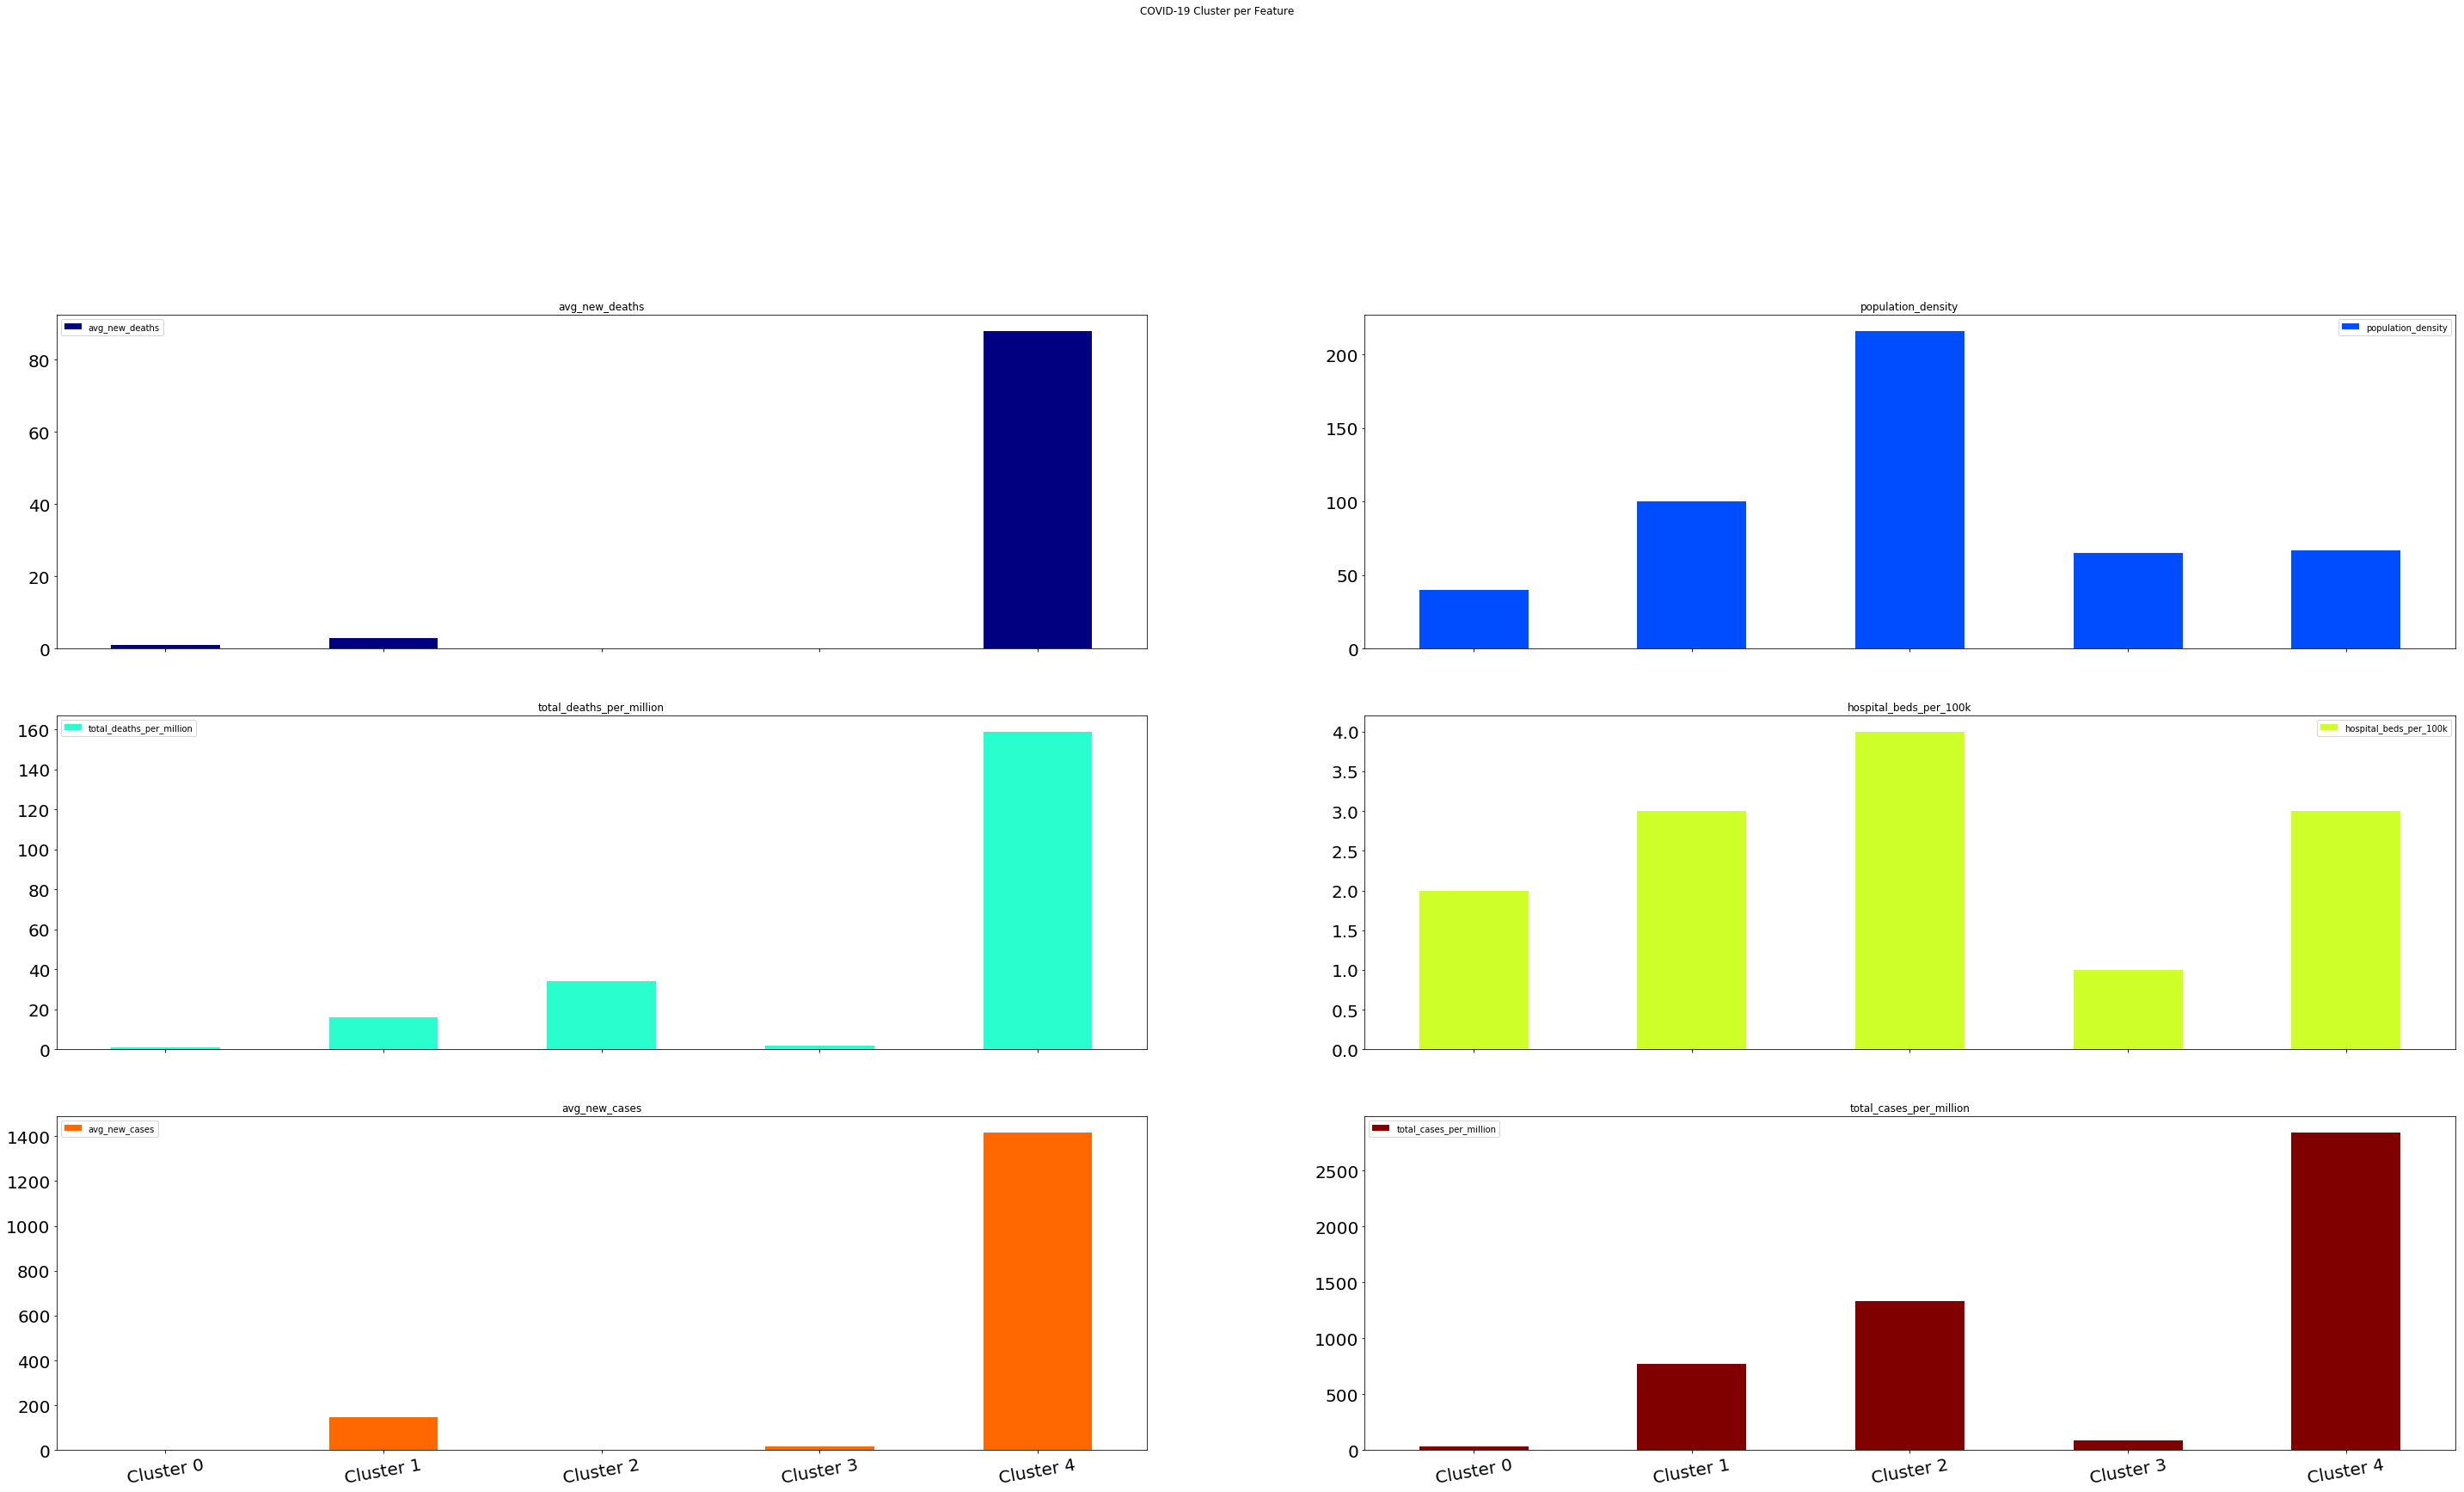

In [455]:
from matplotlib import pyplot as plt
compare = true_centers.copy()
axes = compare.plot(kind='bar',rot=10,lw=20,colormap='jet',figsize=(50,50),
             title='COVID-19 Cluster per Feature', subplots=True, layout=(6,2),fontsize=20,legend=True,
                   use_index='Cluster')

labels = true_centers.index.values.tolist()
plt.xticks(range(compare.shape[0]), labels)
plt.xlabel(compare.columns.values.tolist())
plt.show()

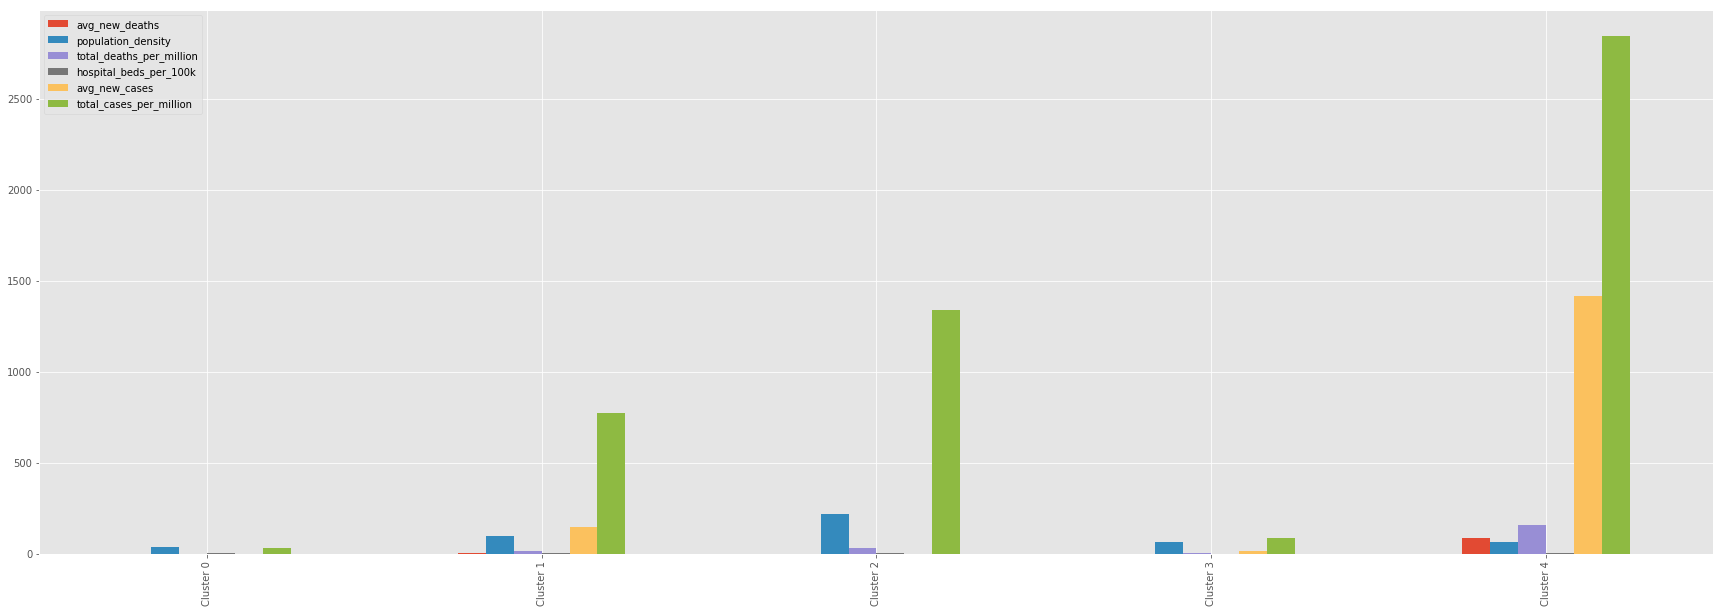

In [456]:

#compare.loc[true_centers.shape[0]] = df2.mean()

plt.style.use('ggplot')

compare.plot(kind='bar', figsize=(30, 10))

labels = true_centers.index.values.tolist()
#labels.append('Data Median')

plt.xticks(range(compare.shape[0]), labels)
plt.yscale("linear")
#{"linear", "log", "symlog", "logit", ...}
#plt.ylim(bottom=1)
plt.yticks()
plt.show()


NameError: name 'cm' is not defined

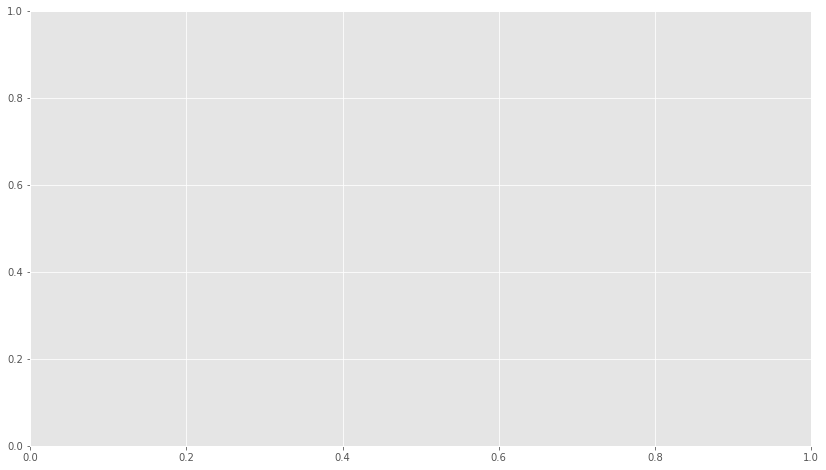

In [457]:
predictions = pd.DataFrame(preds, columns = ['Cluster'])
plot_data = pd.concat([predictions, data_scaled], axis = 1)
    # Generate the cluster plot
fig, ax = plt.subplots(figsize = (14,8))
    
cmap = cm.get_cmap('gist_rainbow')

for i, cluster in plot_data.groupby('Cluster'):
     cluster.plot(ax = ax, kind = 'scatter', x = 'Dim 1', y = 'Dim 2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);
    

Text(0, 0.5, 'Inertia')

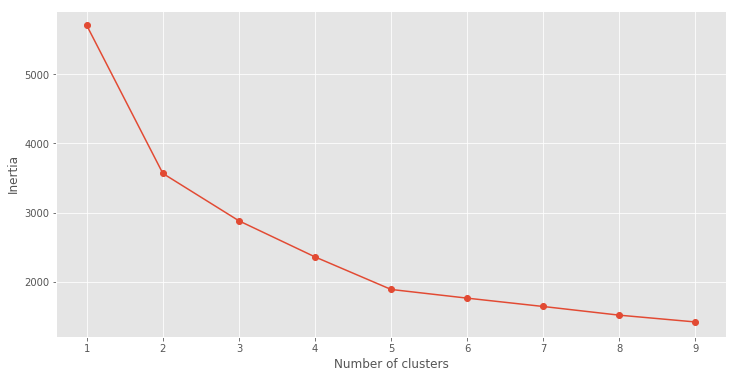

In [458]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')



In [ ]:
'''
Online Prediction
{"instances":[
[0.290428,1.376992,1.722767,2.923162,2.2,5.2,5.6,3.9,6.3,1.0,1.9]
]
}
'''


<font size=6><b> Hierarchical Clustering

In [94]:
from sklearn.cluster import AgglomerativeClustering
cluster_2nd = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') 
#cluster_2nd = AgglomerativeClustering(n_clusters=None, compute_full_tree=True,affinity='cosine', linkage='complete',distance_threshold=True) 
#cluster_2nd = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='complete') 
preds_2nd = cluster_2nd.fit_predict(data_scaled)

#preds = cluster.predict(data_scaled)

# TODO: Find the cluster centers
#centers = cluster.cluster_centers_

frame_2nd = pd.DataFrame(data_scaled)
frame_2nd['cluster'] = preds_2nd
frame_2nd['cluster'].value_counts()

1    73
2    50
3    32
0    32
4    19
Name: cluster, dtype: int64

In [428]:
df1.loc[frame_2nd[frame_2nd['cluster']==4].index.values]

,aged_70_older,median_age,avg_new_cases,diabetes_prevalence,aged_65_older,total_deaths_per_million,total_cases_per_million,hospital_beds_per_100k,cvd_death_rate,avg_new_deaths,location,population_density
18,12.849,41.8,1007.650000,4.29,18.571,746.875,4580.048,5.64,114.898,198.775000,Belgium,375.564
27,5.060,33.5,3924.550000,8.11,8.552,52.329,765.428,2.20,177.961,273.050000,Brazil,25.040
35,10.797,41.4,1507.800000,7.37,16.984,129.060,1824.167,2.50,105.599,119.375000,Canada,4.037
57,4.458,28.1,681.425000,5.55,7.104,120.557,1675.390,1.50,140.448,51.200000,Ecuador,66.939
68,13.079,42.0,2173.375000,4.77,19.718,404.146,2130.466,5.98,86.060,571.425000,France,122.578
73,15.957,46.6,2555.225000,8.31,21.453,88.525,2023.956,8.00,156.139,167.125000,Germany,237.016
90,3.182,32.4,1574.925000,9.59,5.440,79.054,1281.096,1.50,270.308,93.550000,Iran,49.831
92,8.678,38.7,494.025000,3.28,13.928,295.273,4657.139,2.96,126.459,34.675000,Ireland,69.874
95,16.240,47.9,2831.950000,4.78,23.021,505.443,3623.278,3.18,113.151,453.250000,Italy,205.859
120,4.321,29.3,845.175000,13.06,6.857,26.874,271.630,1.38,152.783,85.900000,Mexico,66.444


<font size=6><b> Usage of HDBSCAN* for Clustering

In [665]:
!pip install hdbscan

    100% |████████████████████████████████| 4.7MB 3.2MB/s ta 0:00:011
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Stored in directory: /Users/jatinmalhotra/Library/Caches/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [429]:
import hdbscan


clusterer = hdbscan.HDBSCAN(min_cluster_size=6)
preds_3 = clusterer.fit_predict(data_scaled)

In [769]:
clusterer

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=3, min_samples=None, p=None,
        prediction_data=False)

In [430]:

frame_3 = pd.DataFrame(data_scaled)
frame_3['cluster'] = preds_3
frame_3['cluster'].value_counts()

 2    101
 1     73
 0     19
-1     12
Name: cluster, dtype: int64

In [1022]:
df1.loc[frame_2nd[frame_2nd['cluster']==0].index.values]

,total_cases_per_million,total_deaths_per_million,population_density,avg_new_deaths,location,avg_new_cases
0,113.080,3.083,54.422,2.900000,Afghanistan,105.900000
2,130.510,11.448,17.348,11.450000,Algeria,125.175000
7,127.800,6.638,16.177,6.900000,Argentina,120.250000
10,272.197,3.804,3.202,1.925000,Australia,55.850000
11,1752.865,68.618,106.749,12.250000,Austria,140.125000
17,2431.180,13.863,46.858,3.275000,Belarus,570.525000
18,4580.048,746.875,375.564,198.775000,Belgium,1007.650000
23,218.966,10.109,10.202,2.775000,Bolivia,61.025000
27,765.428,52.329,25.040,273.050000,Brazil,3924.550000
30,282.797,13.096,65.180,2.075000,Bulgaria,39.150000


In [1048]:
df2=pd.read_csv("OxCGRT_response_tracker.csv")


In [1052]:
df2.CountryName.unique().shape

(158,)

In [1049]:
df2.shape

(20845, 36)

In [28]:
df2.head(10)

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
5,Aruba,ABW,20200106,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
6,Aruba,ABW,20200107,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
7,Aruba,ABW,20200108,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
8,Aruba,ABW,20200109,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
9,Aruba,ABW,20200110,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [30]:
df2.CountryName.unique().shape

(158,)

In [1042]:
(df2.isna().mean().round(4)*100).sort_values(ascending=False)

M1_Wildcard                              100.00
E1_Flag                                   84.31
C5_Flag                                   72.99
C6_Flag                                   68.71
C7_Flag                                   66.81
C2_Flag                                   65.56
C4_Flag                                   65.01
C1_Flag                                   58.59
C3_Flag                                   58.23
H1_Flag                                   41.24
ConfirmedDeaths                           36.73
ConfirmedCases                            36.73
E4_International support                  22.16
E1_Income support                         14.00
E2_Debt/contract relief                   13.05
E3_Fiscal measures                        12.05
H4_Emergency investment in healthcare     10.06
H5_Investment in vaccines                  9.38
StringencyIndex                            9.19
C4_Restrictions on gatherings              8.90
C6_Stay at home requirements            

In [32]:
df2.H1_Flag.unique()

array([nan,  1.,  0.])

In [36]:
df2.drop(['M1_Wildcard','E1_Flag','C5_Flag','C6_Flag','C7_Flag','C2_Flag','C4_Flag','C1_Flag','C3_Flag','H1_Flag','ConfirmedDeaths','ConfirmedCases'], axis=1, inplace=True)


In [1047]:
df2["CountryName","C8_International travel controls"]

,CountryName,C8_International travel controls
0,Aruba,0.0
1,Aruba,0.0
2,Aruba,0.0
3,Aruba,0.0
4,Aruba,0.0
5,Aruba,0.0
6,Aruba,0.0
7,Aruba,0.0
8,Aruba,0.0
9,Aruba,0.0


In [1058]:
(df2.sort_values('Date').groupby('CountryName').apply(lambda x: x.tail(1))).reset_index(drop=True)\
[{'CountryName','StringencyIndexForDisplay'}]


,CountryName,StringencyIndexForDisplay
0,Afghanistan,73.56
1,Albania,88.36
2,Algeria,82.42
3,Andorra,59.12
4,Angola,86.77
5,Argentina,76.45
6,Aruba,91.93
7,Australia,68.26
8,Austria,60.97
9,Azerbaijan,86.24


In [ ]:
'''
Open the Cloud Storage browser in the Google Cloud Platform Console.
In the list of buckets, click on the name of the bucket that you want to make public.
Select the Permissions tab near the top of the page.
Click the Add members button.
The Add members dialog box appears.
In the Members field, enter allUsers.
In the Roles drop down, select the Storage sub-menu, and click the Storage Object Viewer option.
Click Add.
'''

In [1]:
!python3 -m venv covid_env
!source covid_env/bin/activate

In [2]:
! pip install --ignore-installed spark-nlp==2.4.0

    100% |████████████████████████████████| 112kB 1.3MB/s ta 0:00:01


In [3]:
import sys
import time

#Spark NLP
import sparknlp
from sparknlp.pretrained import PretrainedPipeline
from sparknlp.annotator import *
from sparknlp.common import RegexRule
from sparknlp.base import *

In [4]:
spark = sparknlp.start()

print("Spark NLP version: ", sparknlp.version())
print("Apache Spark version: ", spark.version)

Spark NLP version:  2.4.0
Apache Spark version:  2.4.1


In [43]:
pipeline = PretrainedPipeline('recognize_entities_dl', lang='en')

recognize_entities_dl download started this may take some time.
Approx size to download 159 MB
[OK!]


In [44]:
text = "we are sad"
result = pipeline.annotate(text)

In [45]:
list(result.keys())

['entities', 'document', 'token', 'ner', 'embeddings', 'sentence']

In [47]:
result['entities']

[]